### Game of Pig

Rules:

1. Two players take turns rolling a single die as many times as they wish. Each roll adds a score equal to the number rolled to the player's total.
2. If a player rolls a 1, their score for that turn is zero, and their turn ends.
3. At any point during a player's turn, they can choose to stop rolling and keep their score. The first player to reach 100 wins.

That's it! Let's play.

There are two basic strategies for this game.  The first is known as roll-based strategy, where you roll a set number of times on each turn (unless you lose).  The second is known as score-based strategy, where you roll until you reach a certain score, and then stop.

Here, we investigate the score-based strategy.

In [6]:
# The usual libraries
import random
import matplotlib.pyplot as plt
import numpy as np


# A couple of debug flags to control print statements
debug1 = False
debug2 = False

# Number of games to simulate for each configuration
nsims = 10000

In [7]:
# function to play an entire game of pig
# N_stop is the score at which the player will stop rolling
# end_score is the score at which the game ends
# returns the average roll per turn

def game_play(N_stop,end_score):

    # Initialize the score (for each of two players) and turn number within the game
    score = [0,0]
    turn = 0

    # Play the game - keep going until one player reaches the end score
    while score[0] < end_score and score[1] < end_score:

        # Initialize the score for this player during this turn and increment turn number
        turn_score = 0
        turn += 1

        if debug2:
            print("Turn", turn)
            for i in range(2):
                print("Player", i+1, "score:", score[i])
            print("Player", turn%2+1, "turn")

        roll = 0
        # Keep rolling until you roll a 1 or reach N_stop
        while roll != 1 and turn_score < N_stop and score[turn%2] < end_score:

            roll = random.randint(1,6)
            if debug2:
                print("Roll:", roll)

            if roll == 1:
                if debug2:
                    print("Player", turn%2+1, "loses turn")
                # If you roll a 1, you lose all points for this turn and your turn is over
                score[turn%2] = score[turn%2] - turn_score
                break
            else:
                score[turn%2] += roll
                if debug2:
                    print("Player", turn%2+1, "score:", score[turn%2])
                #
                turn_score += roll

        if debug2:
            print("Player", turn%2+1, "turn over")
            print()

    if debug1:
        print(f"Final score: Player 1: {score[0]}, Player 2: {score[1]}")
        print(f"Player {np.argmax(score)+1} wins!")
        print(f"Game took {turn} turns")

    return 2.0*np.mean(score)/turn

In [8]:
# consider four different end scores .. 50, 100, 200, 500.  For each, plot the average roll vs. N_stop
end_score = [50,100, 200, 500]

# initialize an array to hold the four different arrays of average roll vs. N_stop for the four different end scores.  Each array will have 49 elements, one for each N_stop from 1 to 49
avg_array_sum = []

for j in range(4):
    avg_array = []
    for nstop in range(1,50):
        sum_avg = 0
        for i in range(nsims):
            avg = game_play(nstop,end_score[j])
            sum_avg += avg
            #print(f"Average roll over all turns = {avg}")

        print(f"Average roll over all turns and sims for N_stop = {nstop} is {sum_avg/nsims}")
        avg_array.append(sum_avg/nsims)

    avg_array_sum.append(avg_array)


Average roll over all turns and sims for N_stop = 1 is 3.3705432801699606
Average roll over all turns and sims for N_stop = 2 is 3.374329707002476
Average roll over all turns and sims for N_stop = 3 is 3.8684610387200453
Average roll over all turns and sims for N_stop = 4 is 4.344607765093446
Average roll over all turns and sims for N_stop = 5 is 4.875378345849398
Average roll over all turns and sims for N_stop = 6 is 5.437976491140617
Average roll over all turns and sims for N_stop = 7 is 6.045076412083043
Average roll over all turns and sims for N_stop = 8 is 6.34610607284757
Average roll over all turns and sims for N_stop = 9 is 6.7324369324789455
Average roll over all turns and sims for N_stop = 10 is 6.984972631868904
Average roll over all turns and sims for N_stop = 11 is 7.391514250534576
Average roll over all turns and sims for N_stop = 12 is 7.67294334058858
Average roll over all turns and sims for N_stop = 13 is 7.74017785851333
Average roll over all turns and sims for N_stop

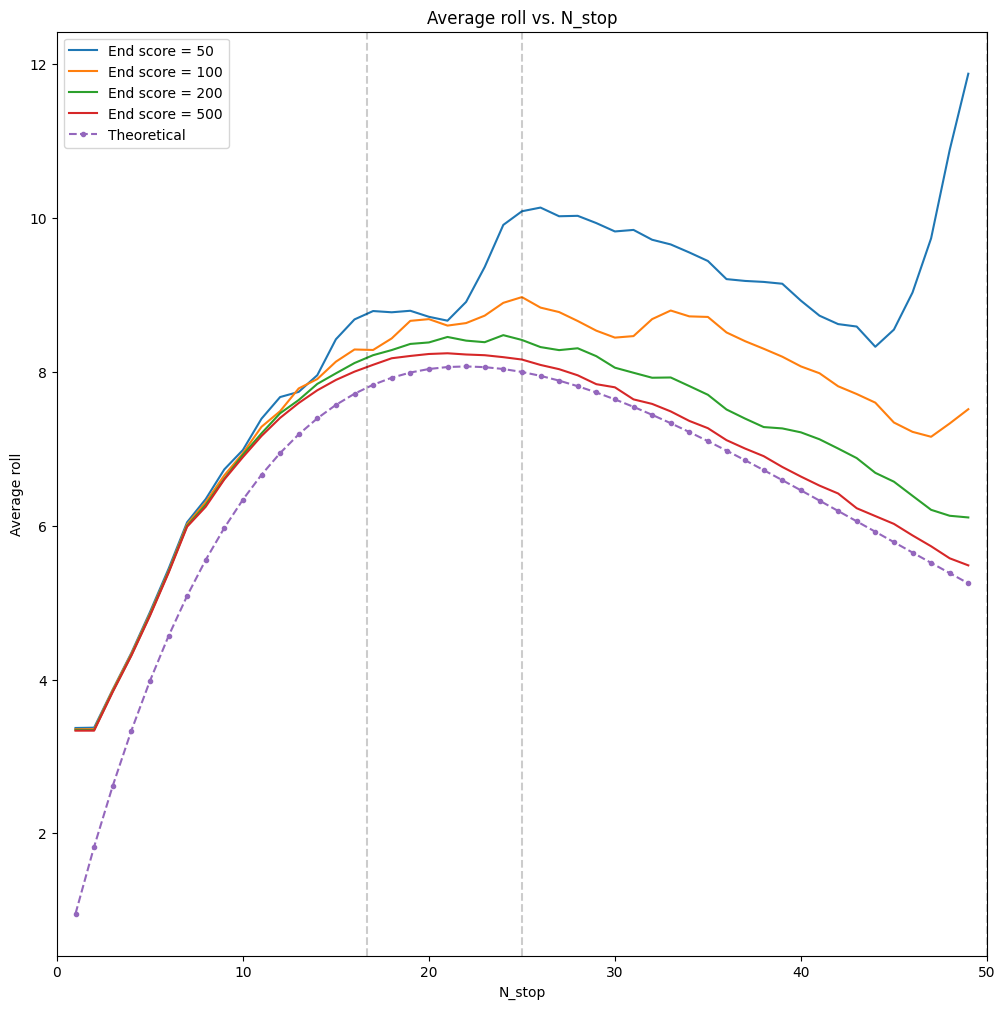

In [9]:
# plot the average roll vs. N_stop for each of the four end scores
fig, ax = plt.subplots(1,1, figsize=(12,12))
for j in range(4):
    ax.plot(range(1,50), avg_array_sum[j], label=f"End score = {end_score[j]}")
    ax.set_xlabel("N_stop")
    ax.set_ylabel("Average roll")
    ax.legend()
    ax.set_title("Average roll vs. N_stop")

# plot some interesting vertical lines ... the idea is that for a certain target end score, one should think about finishing the game in an integral number of turns

score = 50

for i in range(1,4):
    interesting_roll = score/i
    ax.axvline(interesting_roll, color='k', linestyle='--', alpha=0.2)

ax.set_xlim(0,50)

# calculate the theoretical average roll per turn for each N_stop and add to the plot
nstopp = np.arange(1, 50)
prob = (5/6)**(nstopp/4.0) * nstopp

ax.plot(nstopp, prob, '.--', label='Theoretical')
ax.legend()


In [10]:
# Testing the game_play function
debug1 = True
debug2 = True
avg = game_play(10,100)
print(avg)

Turn 1
Player 1 score: 0
Player 2 score: 0
Player 2 turn
Roll: 2
Player 2 score: 2
Roll: 2
Player 2 score: 4
Roll: 5
Player 2 score: 9
Roll: 6
Player 2 score: 15
Player 2 turn over

Turn 2
Player 1 score: 0
Player 2 score: 15
Player 1 turn
Roll: 4
Player 1 score: 4
Roll: 4
Player 1 score: 8
Roll: 1
Player 1 loses turn
Player 1 turn over

Turn 3
Player 1 score: 0
Player 2 score: 15
Player 2 turn
Roll: 5
Player 2 score: 20
Roll: 5
Player 2 score: 25
Player 2 turn over

Turn 4
Player 1 score: 0
Player 2 score: 25
Player 1 turn
Roll: 2
Player 1 score: 2
Roll: 4
Player 1 score: 6
Roll: 6
Player 1 score: 12
Player 1 turn over

Turn 5
Player 1 score: 12
Player 2 score: 25
Player 2 turn
Roll: 1
Player 2 loses turn
Player 2 turn over

Turn 6
Player 1 score: 12
Player 2 score: 25
Player 1 turn
Roll: 6
Player 1 score: 18
Roll: 5
Player 1 score: 23
Player 1 turn over

Turn 7
Player 1 score: 23
Player 2 score: 25
Player 2 turn
Roll: 1
Player 2 loses turn
Player 2 turn over

Turn 8
Player 1 score: 2